In [147]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
import cv2
import xml.etree.ElementTree as ET 
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
from getBoundingBoxes import *
from corner_detector import *
from getBoxFeatures import *
from anms import *
from utils import *
from estimateAllTranslation import *
from estimateFeatureTranslation import *
from applyBoxTransform import *
from ransac_est_homography import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
cap = cv2.VideoCapture('vids/Easy.mp4')
ret,firstFrame = cap.read()
boxes = getBoundingBoxes()
gray = cv2.cvtColor(firstFrame,cv2.COLOR_BGR2GRAY)

boxesData = []

for box in boxes:
    boximg = gray[box[1]:box[3],box[0]:box[2]]
    x,y = getBoxFeatures(boximg,box,100)
    boxData = {
        'coords': box,
        '_x': x,
        '_y': y
    }
    boxesData.append(boxData)

currentFrame = firstFrame
_,nextFrame = cap.read()

In [166]:
boxes = getBoundingBoxes()
currentFrame = cv2.imread('frames/0001.png')
nextFrame = cv2.imread('frames/0002.png')
gray = cv2.cvtColor(currentFrame,cv2.COLOR_BGR2GRAY)
box = boxes[2]
boximg = gray[box[1]:box[3],box[0]:box[2]]
# for i in range(3,110):
#     idx = str(i)
#     idx = (idx.zfill(4))
#     x,y=estimateAllTranslation(x,y,currentFrame,nextFrame)
#     currentFrame = nextFrame
#     print(x.shape)
#     plt.imshow(cv2.cvtColor(nextFrame,cv2.COLOR_BGR2GRAY))
#     fig = plt.gcf()
#     ax1 = fig.add_subplot(111)
#     ax1.scatter(x,y,c='r',s=1)
#     plt.savefig("outputs/"+idx+".png")
#     nextFrame = cv2.imread("frames/"+idx+".png")

In [167]:
x = boxesData[0]['_x']
y = boxesData[0]['_y']
X,Y=estimateAllTranslation(x,y,currentFrame,nextFrame)

print(X-x)
print(Y-y)

[ 0.32884756  0.91243486  0.80124563  0.36457754  0.15981142  0.51446268
  0.83855598  0.52457054  0.29075659  0.82076858  0.72302332  0.78301238
 -0.19308732 -0.33053643  0.99144377  0.86277037  0.93845897  0.51458678
  0.54208949  0.51172128  0.55079284  0.26364206  0.54460442  0.5589008
  0.7795234   0.70321872 -0.15199075  0.35534063  0.66059561  0.74182463
  0.46401122  0.21440113  0.73825046  0.86700934  0.74147554  0.54773712
  0.7570544  -0.21075441  0.26177221  0.21143481  0.37960538 -0.19996832
 -0.17164657  0.49469542 -0.17563859  0.08897963  0.21649831  0.90819538
  0.34994868  0.07407546  0.19185503  0.35841693  0.10576404  0.76311941
  0.63307056  0.82727699  0.74592142  0.2529782   0.25046856  0.43871347
  0.21221537  0.35737786  0.52203894  0.74041703  0.80620137  0.25881099
  0.16818229  0.18555185 -0.19613167  0.30558855  0.25683811  0.62943338
  0.55873933  0.7639281   0.46303859  0.21307969  0.91861239  0.74691718
  0.32809946  0.75360638  0.30313246  0.88338361  0.

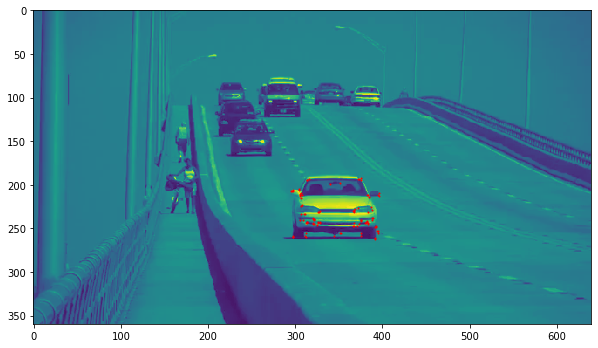

In [168]:
plt.imshow(gray)
fig = plt.gcf()
ax1 = fig.add_subplot(111)
ax1.scatter(x,y,c='r',s=1)

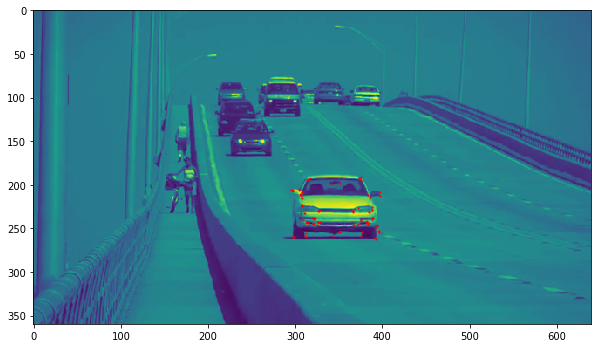

In [169]:
plt.imshow(cv2.cvtColor(nextFrame,cv2.COLOR_BGR2GRAY))
fig = plt.gcf()
ax1 = fig.add_subplot(111)
ax1.scatter(X,Y,c='r',s=1)


In [141]:
print(X-x)
print(Y-y)

[0.32884756 0.91243486 0.80124563 0.36457754 0.15981142 0.51446268
 0.83855598 0.52457054 0.29075659 0.82076858]
[-0.34412905 -0.28966306 -0.35944278 -0.38023156 -0.28213142 -0.36704273
 -0.19385589 -0.32463115 -0.37098466  0.030255  ]


In [170]:
print(x.shape)
h = ransac_est_homography(x, y, X, Y, 0.001)
print(h)

(100,)
(5,)
Max Inlier Count: 5
[[ 8.43805644e-01 -9.37158104e-02  3.71360812e+01]
 [-3.13594321e-02  8.26186720e-01  2.46639219e+01]
 [-1.34244533e-04 -2.84486132e-04  1.00000000e+00]]


In [155]:
pt = np.array([x[0],y[0],1]).T
newpt = h@pt
newpt = newpt/newpt[2]
print(newpt)
print(np.array([X[0],Y[0],1]))

[314.5524993  243.64267809   1.        ]
[314.32884756 243.65587095   1.        ]


In [171]:
n = x.shape[0]
stk = np.vstack((x,y,np.ones(n)))

newstk = np.vstack((X,Y,np.ones(n)))

In [172]:
res=h@stk
res=res/res[2,:]

In [173]:
# bdata=boxesData[0]['coords']
X,Y,_box = applyBoxTransform(x,y,X,Y,box)

In [174]:
_box

array([250.94587517, 145.17530943, 285.29756724, 179.35642041])

In [175]:
box

array([226, 124, 277, 173])

In [ ]:
h